<a href="https://colab.research.google.com/github/Yonch1/Machine_learning/blob/main/Yonatan_Shirman_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to GitHub: https://github.com/Yonch1/Machine-Learning-3

---



Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [59]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

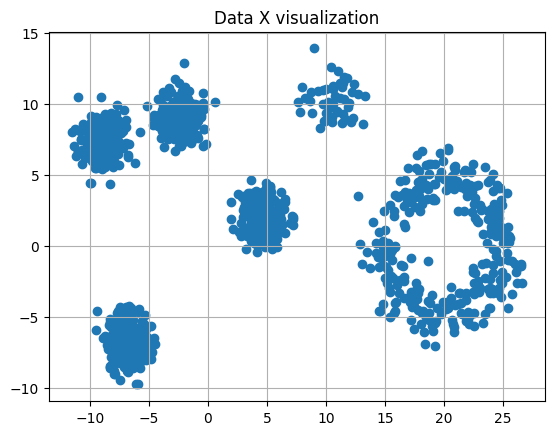

In [60]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:


plt.scatter(X[:, 0], X[:, 1]) #
plt.title("Data X visualization")
plt.grid(True)
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

Silhouette Score for KMeans: 0.7017611019403646


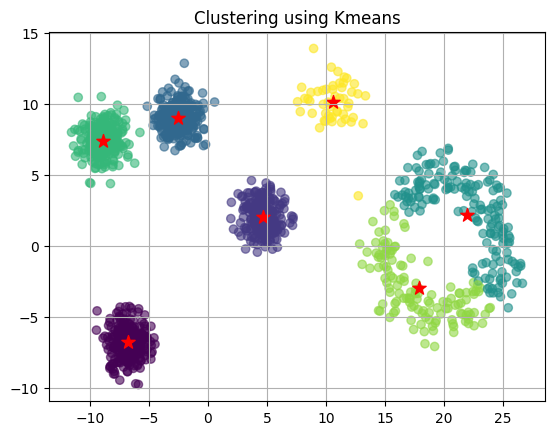

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans= KMeans().fit(X)
kmlabels = kmeans.labels_
KMscore = silhouette_score(X, kmlabels)
centers = kmeans.cluster_centers_
print("Silhouette Score for KMeans:", KMscore)

#visualizing the clustering for convinience

plt.scatter(X[:, 0], X[:, 1],c=kmlabels, cmap='viridis', alpha=0.6) #plotting the given data from X
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=100, label='Centroids') #plotting the centroids of each cluster using 'X' mark
plt.title('Clustering using Kmeans')
plt.grid(True)
plt.show()

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [71]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


Aggl = AgglomerativeClustering(n_clusters=5, metric='manhattan',compute_full_tree=False,linkage='average').fit(X)
cluster_labels = Aggl.labels_
Agglscore = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {Agglscore:}")

Silhouette Score: 0.6768246922298061


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [77]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


DB = DBSCAN(eps=1.5, min_samples=7, metric='manhattan', algorithm='kd_tree').fit(X)
cluster_labels = DB.labels_


if len(set(cluster_labels)) > 1: #cant evaluate clustering quality with only 1 cluster.
    DBscore = silhouette_score(X, cluster_labels)
    print(f"Silhouette Score: {DBscore:}")
else:
    print("Silhouette Score cannot be calculated (only one cluster detected).")


Silhouette Score: 0.7203869947734542


6. Compare the results and choose the best method for the data


In [64]:
scores = {
    "KMeans": KMscore,
    "DBSCAN": DBscore,
    "Agglomerative Clustering": Agglscore
}

best_model = max(scores, key=scores.get)
print(f"The best model is: {best_model} with a silhouette score of {scores[best_model]}")

The best model is: DBSCAN with a silhouette score of 0.7203869947734542
